영상을 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 영상 데이터셋 생성을 해보고, 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성 및 학습 시켜보겠습니다.

---
### 데이터셋 준비

입력 x에 대해 2를 곱해 두 배 정도 값을 갖는 출력 y가 되도록 데이터셋을 생성해봤습니다. 선형회귀 모델을 사용한다면 Y = w * X + b 일 때, w가 2에 가깝고, b가 0.16에 가깝게 되도록 학습시키는 것이 목표입니다.

In [1]:
import numpy as np

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

In [2]:
x_train, y_train = generate_dataset(1000)
x_test, y_test = generate_dataset(100)

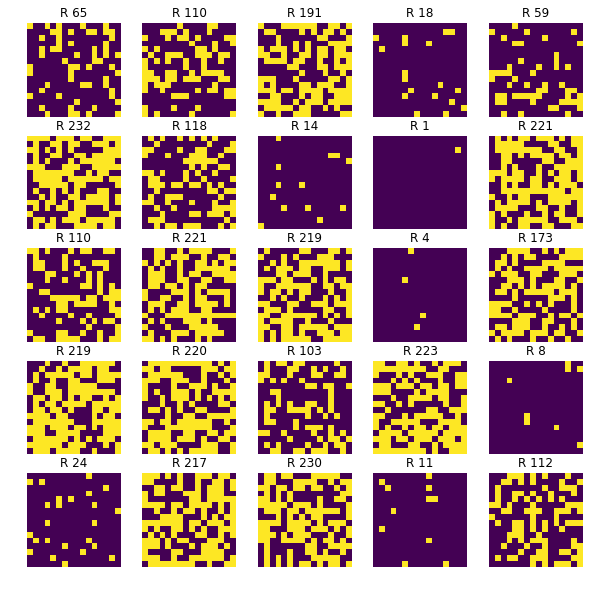

In [3]:
# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    sub_plt.set_title('R ' + str(y_train[i][0]))

plt.show()

MLP 모델

Using TensorFlow backend.


Epoch 1/1000
1000/1000 [==============================] - 0s - loss: 3372.8568     
Epoch 2/1000
1000/1000 [==============================] - 0s - loss: 401.6964     
Epoch 3/1000
1000/1000 [==============================] - 0s - loss: 364.6497     
Epoch 4/1000
1000/1000 [==============================] - 0s - loss: 361.4119     
Epoch 5/1000
1000/1000 [==============================] - 0s - loss: 359.2307     
Epoch 6/1000
1000/1000 [==============================] - 0s - loss: 319.8820     
Epoch 7/1000
1000/1000 [==============================] - 0s - loss: 317.4093     
Epoch 8/1000
1000/1000 [==============================] - 0s - loss: 289.0775     
Epoch 9/1000
1000/1000 [==============================] - 0s - loss: 280.7006     
Epoch 10/1000
1000/1000 [==============================] - 0s - loss: 267.4577     
Epoch 11/1000
1000/1000 [==============================] - 0s - loss: 227.0421     
Epoch 12/1000
1000/1000 [==============================] - 0s - loss: 251.0582     


1000/1000 [==============================] - 0s - loss: 60.0306     
Epoch 99/1000
1000/1000 [==============================] - 0s - loss: 55.4822     
Epoch 100/1000
1000/1000 [==============================] - 0s - loss: 58.6683     
Epoch 101/1000
1000/1000 [==============================] - 0s - loss: 49.2684     
Epoch 102/1000
1000/1000 [==============================] - 0s - loss: 70.8393     
Epoch 103/1000
1000/1000 [==============================] - 0s - loss: 52.9041     
Epoch 104/1000
1000/1000 [==============================] - 0s - loss: 59.0998     
Epoch 105/1000
1000/1000 [==============================] - 0s - loss: 51.8130     
Epoch 106/1000
1000/1000 [==============================] - 0s - loss: 55.5622     
Epoch 107/1000
1000/1000 [==============================] - 0s - loss: 59.9182     
Epoch 108/1000
1000/1000 [==============================] - 0s - loss: 56.1729     
Epoch 109/1000
1000/1000 [==============================] - 0s - loss: 50.7031     
Epoch 11

1000/1000 [==============================] - 0s - loss: 29.9053     
Epoch 196/1000
1000/1000 [==============================] - 0s - loss: 36.4593     
Epoch 197/1000
1000/1000 [==============================] - 0s - loss: 35.1264     
Epoch 198/1000
1000/1000 [==============================] - 0s - loss: 35.2862     
Epoch 199/1000
1000/1000 [==============================] - 0s - loss: 30.7158     
Epoch 200/1000
1000/1000 [==============================] - 0s - loss: 32.8764     
Epoch 201/1000
1000/1000 [==============================] - 0s - loss: 33.5015     
Epoch 202/1000
1000/1000 [==============================] - 0s - loss: 36.5176     
Epoch 203/1000
1000/1000 [==============================] - 0s - loss: 33.9898     
Epoch 204/1000
1000/1000 [==============================] - 0s - loss: 31.8381     
Epoch 205/1000
1000/1000 [==============================] - 0s - loss: 30.6989     
Epoch 206/1000
1000/1000 [==============================] - 0s - loss: 36.8207     
Epoch 2

1000/1000 [==============================] - 0s - loss: 17.9837     
Epoch 293/1000
1000/1000 [==============================] - 0s - loss: 29.2267     
Epoch 294/1000
1000/1000 [==============================] - 0s - loss: 19.7841     
Epoch 295/1000
1000/1000 [==============================] - 0s - loss: 27.5341     
Epoch 296/1000
1000/1000 [==============================] - 0s - loss: 23.2506     
Epoch 297/1000
1000/1000 [==============================] - 0s - loss: 24.2560     
Epoch 298/1000
1000/1000 [==============================] - 0s - loss: 25.7382     
Epoch 299/1000
1000/1000 [==============================] - 0s - loss: 23.5163     
Epoch 300/1000
1000/1000 [==============================] - 0s - loss: 25.6205     
Epoch 301/1000
1000/1000 [==============================] - 0s - loss: 21.9404     
Epoch 302/1000
1000/1000 [==============================] - 0s - loss: 23.0078     
Epoch 303/1000
1000/1000 [==============================] - 0s - loss: 26.4939     
Epoch 3

1000/1000 [==============================] - 0s - loss: 19.3826     
Epoch 390/1000
1000/1000 [==============================] - 0s - loss: 20.9959     
Epoch 391/1000
1000/1000 [==============================] - 0s - loss: 20.2974     
Epoch 392/1000
1000/1000 [==============================] - 0s - loss: 24.3401     
Epoch 393/1000
1000/1000 [==============================] - 0s - loss: 22.6052     
Epoch 394/1000
1000/1000 [==============================] - 0s - loss: 17.8640     
Epoch 395/1000
1000/1000 [==============================] - 0s - loss: 15.7400     
Epoch 396/1000
1000/1000 [==============================] - 0s - loss: 22.8182     
Epoch 397/1000
1000/1000 [==============================] - 0s - loss: 21.0759     
Epoch 398/1000
1000/1000 [==============================] - 0s - loss: 19.8949     
Epoch 399/1000
1000/1000 [==============================] - 0s - loss: 19.3330     
Epoch 400/1000
1000/1000 [==============================] - 0s - loss: 19.2616     
Epoch 4

1000/1000 [==============================] - 0s - loss: 16.1386     
Epoch 487/1000
1000/1000 [==============================] - 0s - loss: 14.3588     
Epoch 488/1000
1000/1000 [==============================] - 0s - loss: 19.6046     
Epoch 489/1000
1000/1000 [==============================] - 0s - loss: 14.6263     
Epoch 490/1000
1000/1000 [==============================] - 0s - loss: 15.9552     
Epoch 491/1000
1000/1000 [==============================] - 0s - loss: 17.3115     
Epoch 492/1000
1000/1000 [==============================] - 0s - loss: 15.8326     
Epoch 493/1000
1000/1000 [==============================] - 0s - loss: 18.3821     
Epoch 494/1000
1000/1000 [==============================] - 0s - loss: 18.0915     
Epoch 495/1000
1000/1000 [==============================] - 0s - loss: 15.1801     
Epoch 496/1000
1000/1000 [==============================] - 0s - loss: 18.2272     
Epoch 497/1000
1000/1000 [==============================] - 0s - loss: 14.5109     
Epoch 4

1000/1000 [==============================] - 0s - loss: 14.0690     
Epoch 584/1000
1000/1000 [==============================] - 0s - loss: 16.1621     
Epoch 585/1000
1000/1000 [==============================] - 0s - loss: 15.9786     
Epoch 586/1000
1000/1000 [==============================] - 0s - loss: 15.0280     
Epoch 587/1000
1000/1000 [==============================] - 0s - loss: 14.0528     
Epoch 588/1000
1000/1000 [==============================] - 0s - loss: 13.3778     
Epoch 589/1000
1000/1000 [==============================] - 0s - loss: 11.9268     
Epoch 590/1000
1000/1000 [==============================] - 0s - loss: 16.7084     
Epoch 591/1000
1000/1000 [==============================] - 0s - loss: 12.6454     
Epoch 592/1000
1000/1000 [==============================] - 0s - loss: 14.5655     
Epoch 593/1000
1000/1000 [==============================] - 0s - loss: 13.2852     
Epoch 594/1000
1000/1000 [==============================] - 0s - loss: 15.1579     
Epoch 5

1000/1000 [==============================] - 0s - loss: 13.3426     
Epoch 681/1000
1000/1000 [==============================] - 0s - loss: 13.0295     
Epoch 682/1000
1000/1000 [==============================] - 0s - loss: 13.2320     
Epoch 683/1000
1000/1000 [==============================] - 0s - loss: 11.5524     
Epoch 684/1000
1000/1000 [==============================] - 0s - loss: 15.3824     
Epoch 685/1000
1000/1000 [==============================] - 0s - loss: 13.0904     
Epoch 686/1000
1000/1000 [==============================] - 0s - loss: 9.8906      
Epoch 687/1000
1000/1000 [==============================] - 0s - loss: 13.0728     
Epoch 688/1000
1000/1000 [==============================] - 0s - loss: 11.8142     
Epoch 689/1000
1000/1000 [==============================] - 0s - loss: 11.3014     
Epoch 690/1000
1000/1000 [==============================] - 0s - loss: 11.4378     
Epoch 691/1000
1000/1000 [==============================] - 0s - loss: 15.7654     
Epoch 6

1000/1000 [==============================] - 0s - loss: 10.0487    
Epoch 778/1000
1000/1000 [==============================] - 0s - loss: 10.1870    
Epoch 779/1000
1000/1000 [==============================] - 0s - loss: 12.8452     
Epoch 780/1000
1000/1000 [==============================] - 0s - loss: 11.2121     
Epoch 781/1000
1000/1000 [==============================] - 0s - loss: 12.7056     
Epoch 782/1000
1000/1000 [==============================] - 0s - loss: 11.0161     
Epoch 783/1000
1000/1000 [==============================] - 0s - loss: 12.7237     
Epoch 784/1000
1000/1000 [==============================] - 0s - loss: 12.7393    
Epoch 785/1000
1000/1000 [==============================] - 0s - loss: 12.3851     
Epoch 786/1000
1000/1000 [==============================] - 0s - loss: 9.2251     
Epoch 787/1000
1000/1000 [==============================] - 0s - loss: 13.7524     
Epoch 788/1000
1000/1000 [==============================] - 0s - loss: 11.1181     
Epoch 789/1

1000/1000 [==============================] - 0s - loss: 9.9990     
Epoch 875/1000
1000/1000 [==============================] - 0s - loss: 12.0794     
Epoch 876/1000
1000/1000 [==============================] - 0s - loss: 9.1161      
Epoch 877/1000
1000/1000 [==============================] - 0s - loss: 12.2222     
Epoch 878/1000
1000/1000 [==============================] - 0s - loss: 10.7523     
Epoch 879/1000
1000/1000 [==============================] - 0s - loss: 9.6508      
Epoch 880/1000
1000/1000 [==============================] - 0s - loss: 11.2535    
Epoch 881/1000
1000/1000 [==============================] - 0s - loss: 12.4592    
Epoch 882/1000
1000/1000 [==============================] - 0s - loss: 9.3778     
Epoch 883/1000
1000/1000 [==============================] - 0s - loss: 10.2745     
Epoch 884/1000
1000/1000 [==============================] - 0s - loss: 9.5816      
Epoch 885/1000
1000/1000 [==============================] - 0s - loss: 11.0466     
Epoch 886/1

1000/1000 [==============================] - 0s - loss: 8.2968      
Epoch 972/1000
1000/1000 [==============================] - 0s - loss: 10.7201     
Epoch 973/1000
1000/1000 [==============================] - 0s - loss: 9.2174     
Epoch 974/1000
1000/1000 [==============================] - 0s - loss: 10.7827    
Epoch 975/1000
1000/1000 [==============================] - 0s - loss: 8.7563     
Epoch 976/1000
1000/1000 [==============================] - 0s - loss: 9.4034     
Epoch 977/1000
1000/1000 [==============================] - 0s - loss: 10.8773    
Epoch 978/1000
1000/1000 [==============================] - 0s - loss: 9.2864     
Epoch 979/1000
1000/1000 [==============================] - 0s - loss: 9.0365     
Epoch 980/1000
1000/1000 [==============================] - 0s - loss: 8.7802     
Epoch 981/1000
1000/1000 [==============================] - 0s - loss: 10.2930    
Epoch 982/1000
1000/1000 [==============================] - 0s - loss: 8.5184     
Epoch 983/1000
10

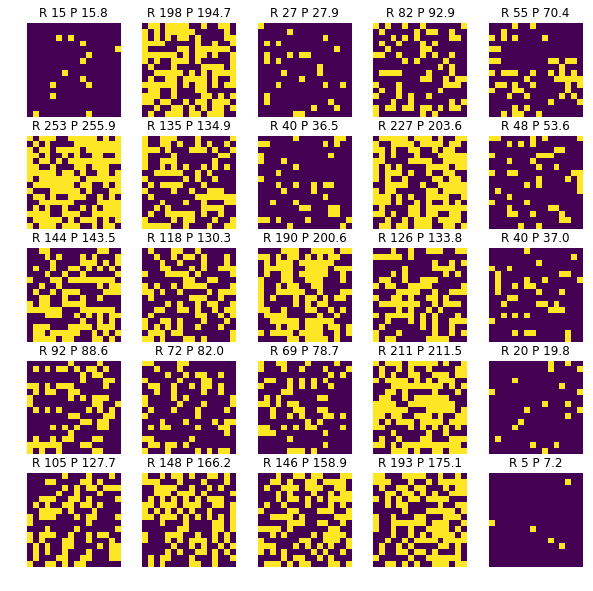

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim = width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop')

model.fit(x_train_1d, y_train, batch_size=32, epochs=1000)

score = model.evaluate(x_test_1d, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test_1d, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

CNN 모델

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop')
model.fit(x_train, y_train, batch_size=32, epochs=1000)

score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test_1d, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

In [ ]:

    
# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_5.png)

---
### 레이어 준비

수치예측 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`를 준비했습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|

---
### 모델 준비

수치예측을 하기 위해 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`을 준비했습니다.

#### 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치예측을 해보겠습니다. 아래 식에서 x, y는 우리가 만든 데이터셋이고, 회귀분석을 통해서, w와 b값을 구하는 것이 목표입니다. 

    Y = w * X + b
   
w와 b값을 구하게 되면, 임의의 입력 x에 대해서 출력 y가 나오는 데 이것이 예측 값입니다. w, b 값은 분산, 공분산, 평균을 이용하여 쉽게 구할 수 있습니다. 

    w = np.cov(X, Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식이지만 이 수식을 도출하기란 꽤나 복잡습니다. 오차를 최소화하는 극대값을 구하기 위해 편미분을 수행하고, 다시 식을 전개하는 등등의 과정이 필요합니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_0.png)    

#### 퍼셉트론 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 Y = w * X + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1m.png)

#### 다층퍼셉트론 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3m.png)    

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`의 전체 소스는 다음과 같습니다. 

#### 선형회귀 모델

In [ ]:
# 선형회귀 모델로 수치예측하기

import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

# 3. 모델 평가하기

y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

#### 퍼셉트론 모델

In [ ]:
# 퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()
print w, b

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 다층퍼셉트론 모델

In [ ]:
# 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 깊은 다층퍼셉트론 모델

In [ ]:
# 깊은 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

---

### 학습결과 비교

퍼셉트론 > 다층퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론|다층퍼셉트론|깊은 다층퍼셉트론|
|:-:|:-:|:-:|
|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 결론

수치예측을 위한 퍼셉트론, 다층퍼셉트론, 깊은 다층퍼셉트론 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)